# NetBeez API examples
## Example 1: Retrive PING test results from a specific agent for the past 60 minutes
## Example 2: Display top 10 agents with most alerts from the last 24 hours

This notebook uses a Python environment to demonstrate how a NetBeez user can retrive data from the API and manipulate them and visualize them in a meaningful way.

First we describe the setup process for getting data from the API.

## Setup your NetBeez Beezkeeper details

First you need to identify your server's FQDN and generate an API key to use in these examples.

If the URL you use to access NetBeez looks like this https://demo.netbeecloud.net then `demo.netbeecloud.net` is the fqdn.

In [1]:
beezkeeper_fqdn="demo.netbeezcloud.net"  ## <--------- CHANGE THIS TO YOUR INSTANCE FQDN
base_url='https://' + beezkeeper_fqdn

In [2]:
from IPython.display import Markdown as md

md(f"To generate an API key head over to https://{beezkeeper_fqdn}/#settings-tab/api-keys-settings")

md(f"For documentation go to https://api.netbeez.net or https://{beezkeeper_fqdn}/swagger/")

For documentation go to https://api.netbeez.net or https://demo.netbeezcloud.net/swagger/

In [3]:
api_key="pYzGcKX-3TqJM2npcUsT06F40ORTpv9KCwhybnP_xKTTXlWQZnYK8Q"  # <--------- CHANGE THIS TO YOUR KEY

## Setup the headers
We define the content type format as JSON and provide the API key that you generated in the previous step as part of the headers.

In [4]:
import requests
import urllib3

urllib3.disable_warnings()


headers = {
            'Cache-Control': 'no-store',
            'Content-type': 'application/json',
            'Authorization': 'Bearer ' + api_key
          }

legacy_api_headers = {
    'Authorization': api_key,
    'API-VERSION': 'v1',
    'Content-type': 'application/json'
}

Note that when the legacy api headers are used it means that we are using the legacy API which is subject to be replaced soon by the new JSON API (documentation here: https://api.netbeez.net)

# Example 1: Get NetBeez Agent information and last 24 hours Ping results.

In this example we will be searching for an agent by name, then selecting the ping tests that are currently running, and then retriving the raw measurement results for those tests from the past 60 minutes.

## Retrieve the agent
First we set retrieve the agent by search by name using this API endpoint: https://api.netbeez.net/#f3d48709-5344-45b7-af9b-7b92feddd4ec.

In [5]:
search_name = "Virtual Agent"
url = f"{base_url}/agents?filter[name]={search_name}&type=beta"


In [6]:
response = requests.request("GET", url, headers=headers, verify=False)

import json
data = json.loads(response.text)
agent = data['data'][0]
print(agent)

{'id': '341', 'type': 'agent', 'attributes': {'name': 'Pittsburgh - Virtual Agent', 'reached_target_test_limit': False, 'reached_scheduled_test_limit': False, 'nb_target_ids': [463, 464, 465, 437, 32], 'nb_test_ids': [1667068, 1667069, 1667070, 1667065, 1667066, 1667067, 1667071, 1688201, 1688302, 1688303, 1688304, 1688305, 1688306, 1688391, 1688392, 1688393, 1688394, 1688395, 1688474, 1688475, 1688476, 1688477, 1688478], 'agent_type_name': 'virtual-model-ova', 'os_version': 'Debian GNU/Linux 8.11 (jessie)', 'kernel_version': '#1 SMP Debian 3.16.51-3 (2017-12-13)', 'created_at': '2021-04-01T19:39:11.000Z', 'uuid': '00:0c:29:09:fa:ee', 'agent_class': 'virtual', 'active': True, 'active_ts': 1631648799161, 'description': None, 'category': 'network_agent', 'software_version': '8.1.1', 'open_incident_id': None, 'test_aggregate_counts_by_type': {'1': {'success': 4, 'fail': 0, 'warning': 1, 'paused': 0, 'unknown': 0}, '2': {'success': 5, 'fail': 0, 'warning': 0, 'paused': 0, 'unknown': 0}, '3

## Retrieve Ping tests
Then we iterate through the tests and select the ping tests.

In [7]:
nb_tests = []
for nb_test_id in agent['attributes']['nb_test_ids']:
    url = f"{base_url}/nb_tests/{nb_test_id}.json"
    response = requests.request("GET", url, headers=legacy_api_headers, verify=False)
    data = json.loads(response.text)
    if data['heir_type'] == 'PingTest':
        print(data)
        nb_tests.append(data)


{'id': 1667068, 'target': 'www.google.com', 'count': 0, 'interval': 5, 'timeout': 5, 'start_ts': '2021-04-01T15:39:11.736-04:00', 'created_at': '2021-04-01T19:39:11.000Z', 'updated_at': '2021-09-21T02:02:01.000Z', 'agent_id': 341, 'test_type_id': 1, 'heir_id': 11374, 'heir_type': 'PingTest', 'ad_hoc': False, 'test_name': None, 'nb_test_templatable_type': 'NbTestTemplate', 'nb_test_templatable_id': 99, 'current_alert_mode': 'success', 'wifi_profile_id': None, 'network_interface_id': 387, 'nb_target_id': 32, 'nb_test_template_id': 99, 'schedule_type': 'periodic', 'options': {'data_size': 54, 'dont_fragment': False, 'tos': None, 'port': None, 'ping_type': 2, 'flags': None, 'jitter_mos': True}, 'alert_mode': 'success', 'interface_type': 'wired'}
{'id': 1667065, 'target': 'demo-app.netbeezcloud.net', 'count': 0, 'interval': 5, 'timeout': 5, 'start_ts': '2021-04-01T15:39:11.604-04:00', 'created_at': '2021-04-01T19:39:11.000Z', 'updated_at': '2021-09-14T21:50:04.000Z', 'agent_id': 341, 'test_

## Retrive the results
Then we retrieve the results for the past 60 minutes.

In [8]:
import time
import datetime
to_ts = int(time.time() * 1000)
from_ts = to_ts - (60 * 60 * 1000)

print(datetime.datetime.fromtimestamp(from_ts/1000.0))
print(datetime.datetime.fromtimestamp(to_ts/1000.0))


2021-09-21 14:22:17.677000
2021-09-21 15:22:17.677000


In [9]:
results = []
import pandas as pd
for nb_test in nb_tests:
    url = f"{base_url}/results.json?nb_test_id={nb_test['id']}&from={from_ts}&to={to_ts}"
    response = requests.request("GET", url, headers=legacy_api_headers, verify=False)
    df = pd.json_normalize(json.loads(response.text), 'index')
    if df.empty == False :
        df['timestamp'] = df['timestamp'].transform(lambda x: datetime.datetime.fromtimestamp(x/1000.0))
        df.set_index('id', inplace=True)
        results.append(df)
    
results = pd.concat(results)

...and here is a printout of the results:

In [10]:
print(results)

             value               timestamp  sequence_number  nb_test_id
id                                                                     
10102936722   10.8 2021-09-21 14:22:22.178          2247379     1667068
10102936874   11.0 2021-09-21 14:22:27.185          2247380     1667068
10102937021   19.0 2021-09-21 14:22:32.195          2247381     1667068
10102937187   11.0 2021-09-21 14:22:37.202          2247382     1667068
10102937304   27.5 2021-09-21 14:22:42.212          2247383     1667068
...            ...                     ...              ...         ...
10103049488   10.8 2021-09-21 15:21:54.564          1448246     1688474
10103049654   10.8 2021-09-21 15:21:59.566          1448247     1688474
10103049826   10.7 2021-09-21 15:22:04.567          1448248     1688474
10103049937   10.7 2021-09-21 15:22:09.572          1448249     1688474
10103050138   10.7 2021-09-21 15:22:14.577          1448250     1688474

[3544 rows x 4 columns]


In [11]:
results_pivot = results.pivot(index='timestamp', columns='nb_test_id', values='value')
pf = results_pivot.interpolate()
print(pf)

nb_test_id               1667065  1667068  1688303  1688391  1688474
timestamp                                                           
2021-09-21 14:22:21.992    14.30      NaN      NaN      NaN      NaN
2021-09-21 14:22:22.178    13.72    10.80      NaN      NaN      NaN
2021-09-21 14:22:22.199    13.14    10.84      0.0      NaN      NaN
2021-09-21 14:22:22.290    12.56    10.88     41.2    106.0      NaN
2021-09-21 14:22:22.467    11.98    10.92     82.4    105.8     10.1
...                          ...      ...      ...      ...      ...
2021-09-21 15:22:14.171    10.58    20.20    219.6    105.0     10.7
2021-09-21 15:22:14.201    10.56    20.20    218.0    105.0     10.7
2021-09-21 15:22:14.431    10.54    20.20    218.0    105.0     10.7
2021-09-21 15:22:14.577    10.52    20.20    218.0    105.0     10.7
2021-09-21 15:22:15.032    10.50    20.20    218.0    105.0     10.7

[3544 rows x 5 columns]


<AxesSubplot:xlabel='timestamp'>

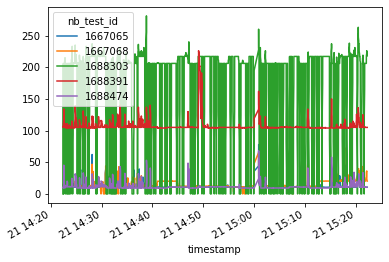

In [12]:
pf.plot()

# Example 2: Get the top 10 Agents with the most alerts triggered during the past 24 hours.

In this example we will be retrieve all the alerts triggered during the past 24 hours. Then we'll group them by agent and count them on a per agent basis. We then sort and pick the top 10. We then enrich the data with the agent names by fetching them through some extra API calls.

First we set the timestamps for `from` and `to`

In [13]:
import time
import datetime
to_ts = int(time.time() * 1000 - 3 * 24 * 60 * 60 * 1000)
from_ts = to_ts - (24 * 60 * 60 * 1000)

print(f"From: {datetime.datetime.fromtimestamp(from_ts/1000.0)}")
print(f"To:   {datetime.datetime.fromtimestamp(to_ts/1000.0)}")

From: 2021-09-17 15:24:30.291000
To:   2021-09-18 15:24:30.291000


We then retrieve the alerts using the `/nb_alerts.json` legacy api from swagger.

In [14]:
url = f"{base_url}/nb_alerts.json?from={from_ts}&to={to_ts}"
response = requests.request("GET", url, headers=legacy_api_headers, verify=False)

df = pd.json_normalize(response.json(), 'current_alerts')
print(df)

KeyError: 'current_alerts'

Then we filter out only the alerts with severity less than 5 (faillure alerts have severity 1, and warning alerts have severity 4. When an alert is cleared that event is marked with severity 6). Then count the alerts per agent, and then get the top 10.

In [ ]:
opening_alerts = df[df['severity'] < 5]
count_per_agent = opening_alerts[['source_agent_id', 'severity']].groupby(['source_agent_id']).count()
count_per_agent = count_per_agent.rename(columns={'severity':'count'})
count_per_agent.index = pd.to_numeric(count_per_agent.index, downcast='integer')
top_10 = count_per_agent.nlargest(10, columns='count')
print(top_10)

### Enrich the data with speedtest results:

In [ ]:
search_term='Internet Bandwidth'
url = f"{base_url}/scheduled_nb_test_templates?filter[label]={search_term}"

response = requests.request("GET", url, headers=legacy_api_headers, verify=False)
scheduled_test_templates=response.json()
print(scheduled_test_templates)

In [ ]:
scheduled_nb_test_template_id = scheduled_test_templates['data'][0]['id']

agent_ids = ','.join(top_10.index.array.astype('str'))



In [ ]:
url = f"{base_url}/scheduled_nb_test_templates/{scheduled_nb_test_template_id}/results?filter[ts][value1]={from_ts}&filter[ts][value1]={to_ts}&filter[ts][operator]<=>&filter[agent_ids]={agent_ids}"

response = requests.request("GET", url, headers=legacy_api_headers, verify=False)

print(response.json())

In [ ]:
results = pd.json_normalize(response.json()['data'])
print(results)


results = pd.json_normalize(results['attributes.result_values'])

print(results)

### Plot the alerts

To convert the agent ids to agent names we then retrieve the agent objects one by one and extract the name strings from those objects.

In [ ]:
agent_names = []
for agent_id in top_10.index:
    url = f"{base_url}/agents/{agent_id}.json"
    response = requests.request("GET", url, headers=legacy_api_headers, verify=False)
    agent_names.append(response.json()['name'])
    
print("Done loading names")

Finally, we prepare the data for plotting.

In [ ]:
to_plot = pd.DataFrame(index=agent_names, data=top_10.values, columns=['Alert Count'])
to_plot.index.rename('Agents')
print(to_plot)

In [ ]:
to_plot.plot.bar()